## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

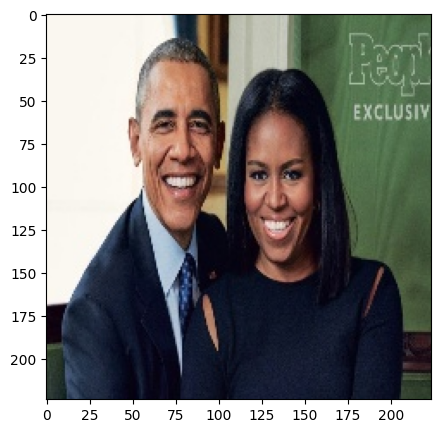

In [108]:
import cv2
# load in color image for face detection
image = cv2.imread(r'C:\Users\ggaut\OneDrive\Desktop\github_projects\CVND-Facial-Keypoint-Detection\research\obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(7,5))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


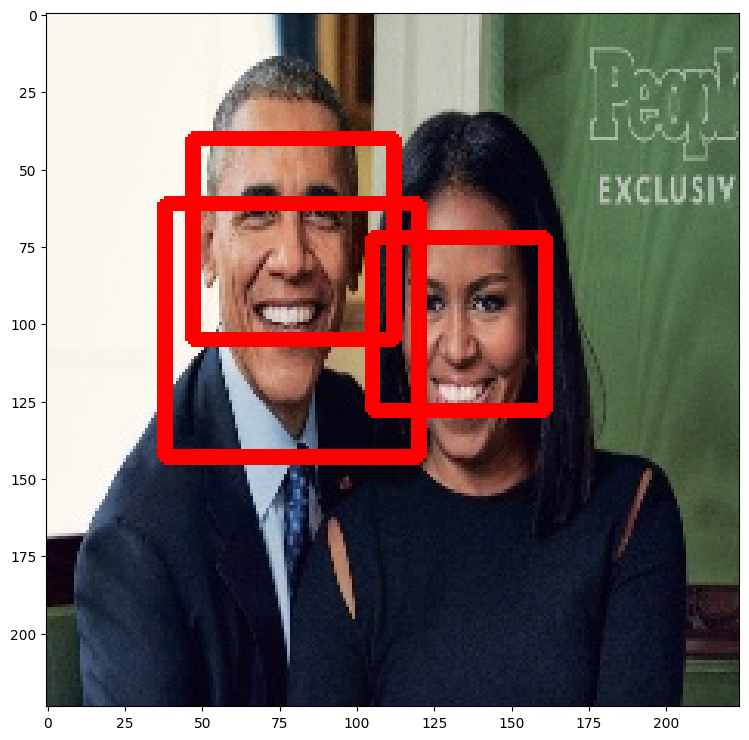

In [109]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detzection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [110]:
import torch
import torch.nn as nn
from models import MobileNetV2

net = MobileNetV2()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load(r'saved_models/keypoints_model.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

MobileNetV2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
       

In [111]:
import torch
from models import mobilenetv2  # Make sure to adjust the import path based on your project structure

# Instantiate the model
net = mobilenetv2()

# Load the saved model parameters
model_path = r'C:\Users\ggaut\OneDrive\Desktop\github_projects\CVND-Facial-Keypoint-Detection\saved_models\keypoints_model.pt'
net.load_state_dict(torch.load(model_path))

# Set the model in evaluation mode
net.eval()

# Example: Forward pass with a dummy input
dummy_input = torch.randn(1, 1, 224, 224)  # Adjust the input size accordingly
output = net(dummy_input)

# Now you can use the 'output' for further processing or visualization


## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

**Hint**: The sizes of faces detected by a Haar detector and the faces your network has been trained on are of different sizes. If you find that your model is generating keypoints that are too small for a given face, try adding some padding to the detected `roi` before giving it as input to your model.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [112]:
def show_all_keypoints(image, predicted_key_pts):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=5, marker='.', c='m') 

Shape of roi before resizing: (103, 103)
Shape of roi after resizing: (224, 224)
Shape of roi before resizing: (88, 88)
Shape of roi after resizing: (224, 224)
Shape of roi before resizing: (130, 130)
Shape of roi after resizing: (224, 224)


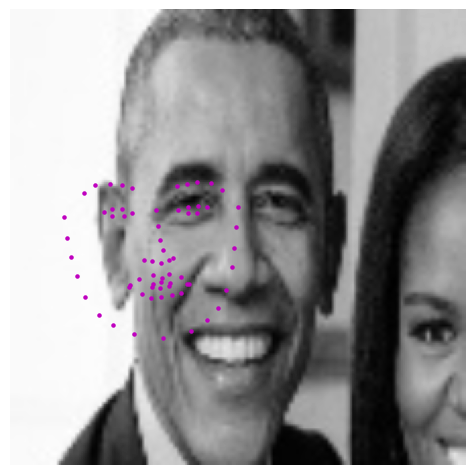

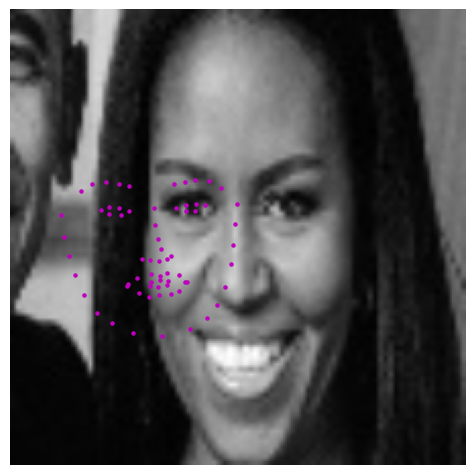

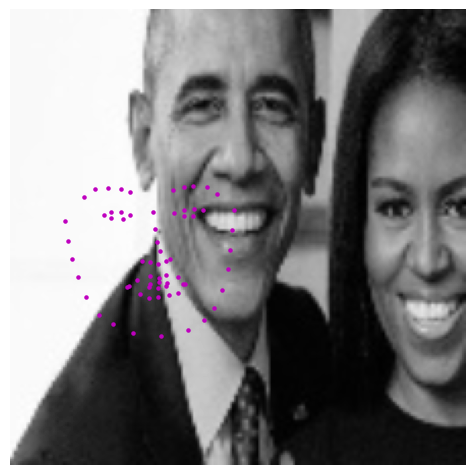

In [122]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
i = 0
for (x, y, w, h) in faces:
    
    plt.figure(figsize=(20,10))
    ax = plt.subplot(1, len(faces), i+1)
    i += 1
    
    # Select the region of interest which is the face in the image
    margin = 0.3      
    roi = image_copy[y-int(margin*h):y+h+int(margin*h), x-int(margin*w):x+w+int(margin*w)]
    
    # Ensure roi is not empty
    if roi.shape[0] == 0 or roi.shape[1] == 0:
        continue
    
    # Check if the image is in RGB format
    if len(roi.shape) == 3 and roi.shape[2] == 3:
        # Convert the face region from RGB to grayscale
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
        
        # Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
        roi = roi/255.0

        # Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
        output_size = 224
        print("Shape of roi before resizing:", roi.shape)
        roi = cv2.resize(roi, (output_size, output_size))
        print("Shape of roi after resizing:", roi.shape)
        
        # Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
        roi_reshaped = roi.reshape(roi.shape[0], roi.shape[1], 1)
        roi_transpose = roi_reshaped.transpose((2, 0, 1))
        roi_transpose = roi_transpose.reshape(1, roi_transpose.shape[0], roi_transpose.shape[1], roi_transpose.shape[2])
        
        # Convert to PyTorch tensor
        roi_tensor = torch.from_numpy(roi_transpose).type(torch.FloatTensor)
        
        # Make facial keypoint predictions using your loaded, trained network 
        # Perform a forward pass to get the predicted facial keypoints
        predicted_key_pts = net(roi_tensor) 
        
        # Reshape to batch_size x 68 x 2 pts
        predicted_key_pts = predicted_key_pts.view(68, -1)
        predicted_key_pts = predicted_key_pts.data.numpy()
        
        # Undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100

        
        # Display each detected face and the corresponding keypoints
        

        
        plt.imshow(roi, cmap='gray')
        plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
        plt.axis('off')
    
plt.show()
